# Procesamiento de textos en el corpus

En esta notebook seguiremos el proceso de limpieza manual del corpus creado para estas clases, donde buscaremos comparar textos de economía política de diversos autores, y se creará la distribución de frecuencia de diversas palabras.

## Archivos del Corpus

El corpus para esta ejercitación consiste en diversas obras de dos economistas que en los últimos meses han sido nombrados muchas veces por todo el espectro político argentino.
Estos son John Maynard Keynes y Friedrich August Von Hayek, quienes se enfrentaron en una polémica desde finales de la década del 20 del siglo anterior. Este debate cimentó las divisiones del pensamiento económico actual. Desde el análisis sobre el papel del Estado hasta la política en la gestión económica.

Los archivos del corpus están disponibles en la carpeta `assets` y los unificaremos como ``keynes_text`` y ``hayek_text``

Vamos a cargar las librerías con las que trabajaremos:
* [OS](https://docs.python.org/es/3/library/os.html), es fundamental para realizar manipulación de archivos y directorios en Python
* [Natural Language Toolkit (NLTK)](http://www.nltk.org/), una potente biblioteca que es utilizada para trabajar con lenguaje natural en Python. Esta proporciona herramientas para tokenización, etiquetado, análisis de texto, corpus de datos, etc.
* [Matplotlib](https://matplotlib.org/), es una biblioteca de visualización. Es utilizada para generar gráficos de los resultados de los análisis realziados, como la frecuencia de palabras. 
* [Re](https://docs.python.org/es/3/library/re.html), módulo para trabajar con expresiones regulares. Es muy útil al momento de realizar limpieza y preprocesamiento del texto, pues elimina caracteres no deseados y normaliza el formato.
* [TextBlob](https://textblob.readthedocs.io/en/dev/), es una librería de procesamiento del texto para Python. Esta permite realizar tareas de Procesamiento del Lenguaje Natural como análisis morfológico, extracción de entidades, análisis de opinión, traducción automática, etc.

In [5]:
import os
import nltk 
from nltk.corpus import stopwords #Importa la lista stopwords que elimina las palabras comunes de un corpus
from nltk.probability import FreqDist #Módulo de la librería que es útil para calcular la frecuencia de aparición de elementos (como palabras) en un texto.
import matplotlib.pyplot as plt
import re
!pip install textblob 
from textblob import TextBlob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/626.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/626.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/626.3 kB 1.1 MB/s eta 0:00:01
   --- ------------------------------------ 61.4/626.3 kB 1.1 MB/s eta 0:00:01
   --- ------------------------------------ 61.4/626.3 kB 1.1 MB/s eta 0:00:01
   --- ------------------------------------ 

In [6]:
import os

# Nos situamos en la carpeta donde se encuentran los archivos
carpeta = 'assets/'

# Generamos una lista vacía para almacenar los textos
keynes_texts = []

# Realizamos una itración sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Comprueba si el archivo comienza con 'keynes' y termina con '.txt'
    if archivo.startswith('keynes') and archivo.endswith('.txt'):
        # Construye la ruta completa del archivo
        ruta_completa = os.path.join(carpeta, archivo)
        # Abre y lee el archivo
        with open(ruta_completa, 'r', encoding='utf-8', errors='replace') as f:
            texto = f.read()
            # Añade el contenido del archivo a la lista
            keynes_texts.append(texto)

for texto in keynes_texts[:5]:
    print(texto)
# Presentamos los primeros elementos
#primeros_elementos = keynes_texts[:5]
#for i, texto in enumerate(primeros_elementos):
#    print(f"Texto {i+1}:\n{texto}\n")


SECCIÓN DE OBRAS DE ECONOMÍA

TEORÍA GENERAL DE LA OCUPACIÓN,

EL INTERÉS Y EL DINERO

2

Traducción de

EDUARDO HORNEDO



Revisión de

ROBERTO REYES MAZZONI

3

JOHN MAYNARD KEYNES

4



Teoría general de la

ocupación, el interés

y el dinero

5



Primera edición en inglés (Nueva York: Harcourt), 1936

Primera edición en español, 1943

Segunda edición (corregida), 1965

Tercera edición, 2001

Cuarta edición (corregida y aumentada), 2003

Cuarta reimpresión, 2013

Primera edición electrónica, 2014

Traducción de la introducción general, introducción editorial

y prefacios a las ediciones alemana, japonesa y francesa:

Juan Carlos Moreno-Brid y Rafael Márquez Arias

© 1973, The Royal Economic Society

Título original: The General Theory of Employment, Interest and Money D. R. © 1943, Fondo de Cultura Económica

Carretera Picacho-Ajusco, 227; 14738 México, D. F.

Empresa certificada ISO 9001:2008

Comentarios:

editorial@fondodeculturaeconomica.com

Tel. (55) 5227-4672

Se prohíbe la 

In [7]:
#Ahora repetimos para Hayek

# Nos situamos en la carpeta donde se encuentran los archivos
carpeta = 'assets/'

# Generamos una lista vacía para almacenar los textos
hayek_texts = []

# Realizamos una itración sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Comprueba si el archivo comienza con 'keynes' y termina con '.txt'
    if archivo.startswith('hayek') and archivo.endswith('.txt'):
        # Construye la ruta completa del archivo
        ruta_completa = os.path.join(carpeta, archivo)
        # Abre y lee el archivo
        with open(ruta_completa, 'r', encoding='utf-8', errors='replace') as f:
            texto = f.read()
            # Añade el contenido del archivo a la lista
            hayek_texts.append(texto)

# Presentamos la lista con los textos cargados
for texto in hayek_texts[:5]:
    print(texto)
#Código para listar los primeros elementos
# primeros_elementos = hayek_texts[:5]
#for i, texto in enumerate(primeros_elementos):
#    print(f"Texto {i+1}:\n{texto}\n")

folio

Título original: Denationalisation of Money An Analysis of the Theory and Practice of Concurrent Currencies The Institute of Economic Affairs, 2ª ed. 1978

Traducción de Carmen Liaño

© 1983, Insituto de Economía de Mercado

Unión Editorial, S.A.

© Para la presente edición, Ediciones Folio, 1996

Muntaner, 371-373, 08021 Barcelona

I.S.B.N.: 84-413-0515-3

Depósito Legal: B. 33159-96

Impreso y encuadernado por:

Printer Industria Gráfica, S.A.

Sant Vicenç dels Horts (Barcelona)

Printed in Spain

INTRODUCCIÓN

Los problemas monetarios han constituido un tema de preocupación y análisis para los economistas desde el nacimiento mismo de nuestra ciencia. Pero, pese al tiempo transcurrido y a la larga experiencia disponible sobre graves, y a veces trágicas, crisis debidas a desequilibrios monetarios, el concepto y las funciones del dinero siguen siendo de difícil comprensión tanto para muchos economistas corno para el público en general.

El libro que aquí se presenta en lengua es

##### Explicación del código

* ``os.listdir (carpeta)``, realiza una lista de todos los archivos en la carpeta especificada.
* ``archivo.startswith(' ')`` and ``archivo.endswith('.txt')``, filtrará los archivos que comienzan con los caracteres que se especifique entre comillas simples y termine con ".txt"
* ``os.path.join(carpeta, archivo)``, con este comando indicamos que se construya la ruta completa para acceder al archivo
* `with open(ruta_completa, 'r', encoding='utf-8') as f:`: Se abrirá el archivo en modo lectura con codificación UTF-8
* ``f.read()``: Leerá el contenido del archivo
* ``keynes_texts.append(texto)``: Se añadirá el contenido del archivo a la lista keynes_texts
* Con ``for texto in keynes_texts[:5]:`` ``print(texto)`` nos aseguramos que si hay algo en la lista lo presentará sino indicará que la lista está vacía. 

## Preparición del texto para procesarlo

Previo al procesamiento del corpus, deberemos realizar algunos cambios, eliminar las palabras vacías (stopwords) en español, y cargar el tokenizador en el idioma que trabajamos.

Recordemos que las palabras vacías son las más abundantes en un texto, y están conformadas por verbos de uso común, artículos, preposiciones, etc.

La tokenización es un proceso por el cual se divide un texto en unidades más pequeñas, que se denominan **tokens**. Estos pueden ser palabras, frases o caracteres.

##### Creamos una función de preprocesamiento

A continuación generaremos una función para trabajar con nuestros textos, en ella indicaremos, que convierta todo a minúsculas, que elimine y sustituta los caracteres que no sean alfanuméricos, por espacios. Que posteriormente tokenize el texto, y que por último elimine las palabras vacías. 

In [17]:
# Se descarga el tokenizer y stopwords en español
nltk.download('punkt') #tokenizador que además incluye reconocimiento del sistema de puntuación
nltk.download('stopwords') #función que contiene palabras vacías

def correct_spelling(text):
    # Usamos TextBlob para corrección ortográfica automática
    corrected_text = str(TextBlob(text).correct())
    return corrected_text

# Se define una función para preprocesar el texto en español
def preprocess(text):
    
     # Corrección ortográfica automática
   # text = correct_spelling(text)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar caracteres no alfanuméricos que no forman parte de las palabras
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenizar el texto en palabras individuales
    tokens = nltk.word_tokenize(text)
    
    # Ahora si tokenizamos el texto
    tokens = nltk.word_tokenize(text, language='spanish')
    
    # Finalmente le indicamos a la función que elimine las stopwords en español
    tokens = [word for word in tokens if word not in stopwords.words('spanish') and len(word) > 3]
    
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Preprocesar las listas de textos
keynes_tokens = [token for text in keynes_texts for token in preprocess(text)]

# Mostrar los primeros elementos de la lista preprocesada para verificar
print(keynes_tokens[:5])  # Imprime los primeros 2 textos preprocesados

['sección', 'obras']


In [19]:
# Preprocesar las listas de textos

hayek_tokens = [token for text in hayek_texts for token in preprocess(text)]

# Mostrar los primeros elementos de la lista preprocesada para verificar
print(hayek_tokens[:5])  # Imprime los primeros 2 textos preprocesados

['folio', 'título']


In [20]:
# Frecuencia de Palabras
keynes_fd = FreqDist(keynes_tokens)
# Imprimir las 10 palabras más comunes en los textos de Keynes
print("Palabras más comunes en los textos de Keynes:")
print(keynes_fd.most_common(10))


Palabras más comunes en los textos de Keynes:
[('dinero', 1384), ('puede', 1256), ('precios', 1250), ('capital', 935), ('nivel', 876), ('tasa', 820), ('interés', 765), ('tipo', 712), ('cantidad', 695), ('caso', 689)]


In [23]:
# Frecuencia de Palabras

hayek_fd = FreqDist(hayek_tokens)
# Imprimir las 10 palabras más comunes en los textos de Keynes
print("Palabras más comunes en los textos de Hayek:")
print(hayek_fd.most_common(10))

Palabras más comunes en los textos de Hayek:
[('sólo', 1285), ('libertad', 1253), ('puede', 1240), ('dinero', 883), ('sino', 775), ('bienes', 761), ('poder', 739), ('parte', 694), ('bien', 679), ('precios', 664)]


In [24]:
# Densidad de Vocabulario
keynes_vocabulary_density = len(set(keynes_tokens)) / len(keynes_tokens)
hayek_vocabulary_density = len(set(hayek_tokens)) / len(hayek_tokens)

In [25]:
print("La densidad del vocabulario en los textos de Keynes es:")
print(keynes_vocabulary_density)

La densidad del vocabulario en los textos de Keynes es:
0.18888590184974807


In [26]:
print("La densidad del vocabulario en los textos de Hayek es:")
print(hayek_vocabulary_density)

La densidad del vocabulario en los textos de Hayek es:
0.11159478819053287


In [28]:
#O podemos comparar la densidad de vocabulario de la siguiente manera: 
print(f"Densidad de Vocabulario en Keynes: {keynes_vocabulary_density}")
print(f"Densidad de Vocabulario en Hayek: {hayek_vocabulary_density}")

Densidad de Vocabulario en Keynes: 0.18888590184974807
Densidad de Vocabulario en Hayek: 0.11159478819053287


* Frecuencias de Palabras: Se visualizan las palabras más comunes en las obras de Keynes y Hayek.
* Densidad de Vocabulario: Se compara cómo varía la riqueza léxica entre los dos autores.

# Visualización de las frecuencias

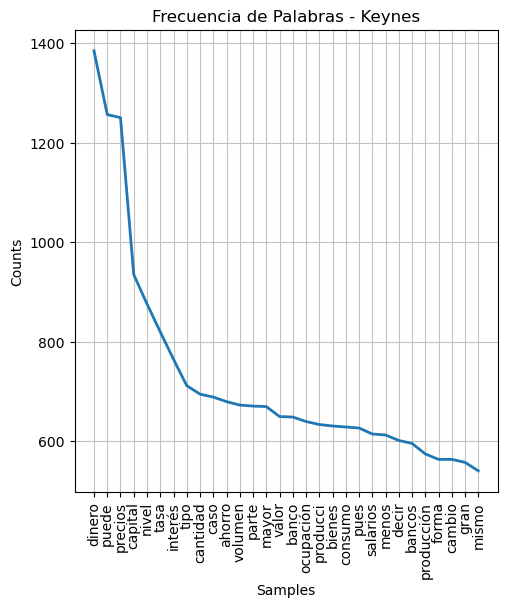

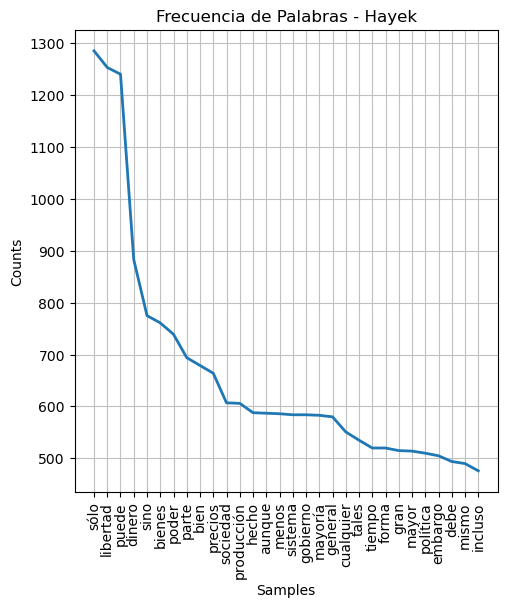

<Figure size 640x480 with 0 Axes>

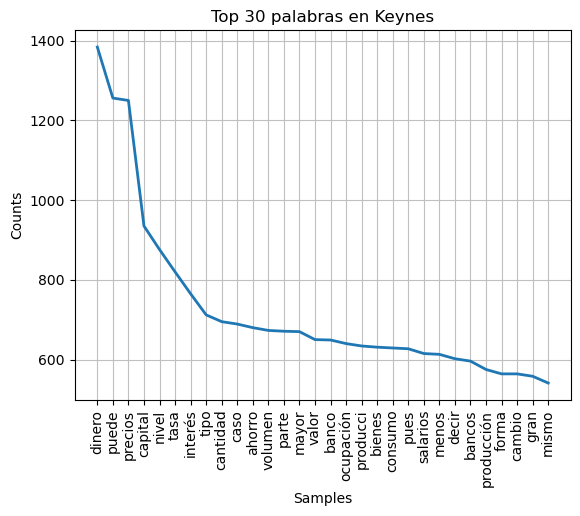

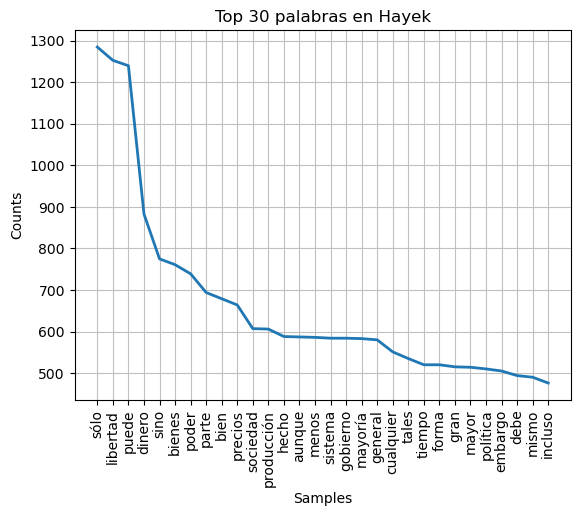

<Axes: title={'center': 'Top 30 palabras en Hayek'}, xlabel='Samples', ylabel='Counts'>

In [30]:
# Graficar las frecuencias de palabras más comunes
plt.figure(figsize=(12, 6))

# Gráfico para Keynes
plt.subplot(1, 2, 1)
keynes_fd.plot(30, title='Frecuencia de Palabras - Keynes')

plt.figure(figsize=(12, 6))

# Gráfico para Hayek
plt.subplot(1, 2, 2)
hayek_fd.plot(30, title='Frecuencia de Palabras - Hayek')

plt.tight_layout()
plt.show()

# Visualización de Frecuencias
keynes_fd.plot(30, title="Top 30 palabras en Keynes")
hayek_fd.plot(30, title="Top 30 palabras en Hayek")

### Análisis de estilo (Tf-Idf, distancias, etc.)

# del que sigue no estoy segura que esea correcto

In [39]:
from scipy.sparse import csr_matrix

# La matriz tfidf_matrix ya es una matriz dispersa en formato csr_matrix
# Podemos trabajar directamente con ella sin convertirla a array denso
# Por ejemplo, para ver los valores TF-IDF de los primeros documentos:

print(f"Número de documentos: {tfidf_matrix.shape[0]}")
print(f"Número de términos: {tfidf_matrix.shape[1]}")

# Mostrar los términos y sus respectivos TF-IDF para el primer documento
first_doc = tfidf_matrix[0]
for term_index in first_doc.indices:
    print(f" - {terms[term_index]}: {first_doc[0, term_index]:.4f}")

Número de documentos: 235235
Número de términos: 20


# calcuclo tf idf vectorizao y grafico

In [36]:
#se podría calcular 
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, max_df=0.8, min_df=5)
tfidf_matrix = vectorizer.fit_transform(keynes_tokens)
terms = vectorizer.get_feature_names_out()

# Ya puedes trabajar con la matriz tfidf_matrix
print(f"Número de documentos: {tfidf_matrix.shape[0]}")
print(f"Número de términos: {tfidf_matrix.shape[1]}")


Número de documentos: 230626
Número de términos: 1000


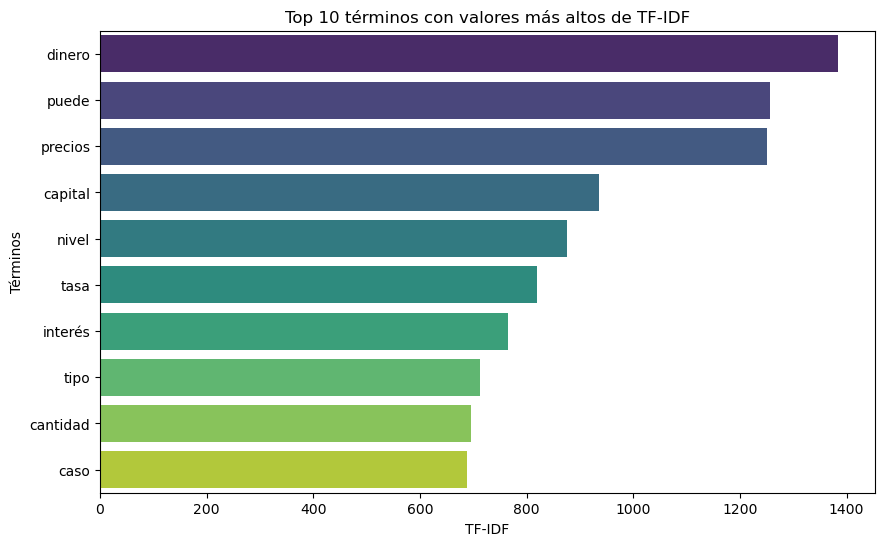

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(keynes_tokens)
terms = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un DataFrame para facilitar el manejo de datos
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=terms)

# Calcular la suma de TF-IDF para cada término en todos los documentos
tfidf_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)

# Seleccionar los términos con los valores de TF-IDF más altos
top_n = 10  # Número de términos a visualizar
top_terms = tfidf_sums.head(top_n)

# Visualización con Seaborn y Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')
plt.title('Top {} términos con valores más altos de TF-IDF'.format(top_n))
plt.xlabel('TF-IDF')
plt.ylabel('Términos')
plt.show()

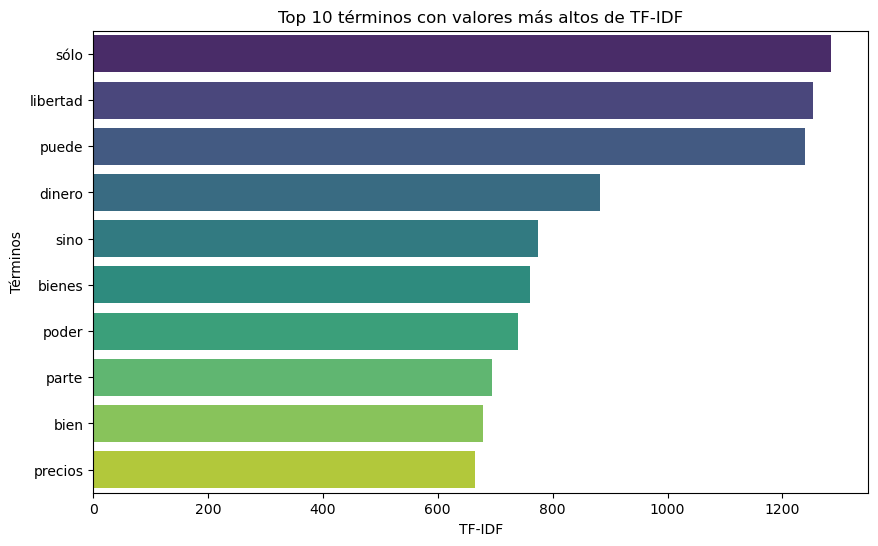

In [38]:
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(hayek_tokens)
terms = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un DataFrame para facilitar el manejo de datos
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=terms)

# Calcular la suma de TF-IDF para cada término en todos los documentos
tfidf_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)

# Seleccionar los términos con los valores de TF-IDF más altos
top_n = 10  # Número de términos a visualizar
top_terms = tfidf_sums.head(top_n)

# Visualización con Seaborn y Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')
plt.title('Top {} términos con valores más altos de TF-IDF'.format(top_n))
plt.xlabel('TF-IDF')
plt.ylabel('Términos')
plt.show()

In [43]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Valor entre -1 (negativo) y 1 (positivo)

# Aplicar el análisis de sentimiento a cada documento
sentiments_keynes = [analyze_sentiment(doc) for doc in keynes_tokens] #probé con text pero tampoco me ceirra


# no me cierra

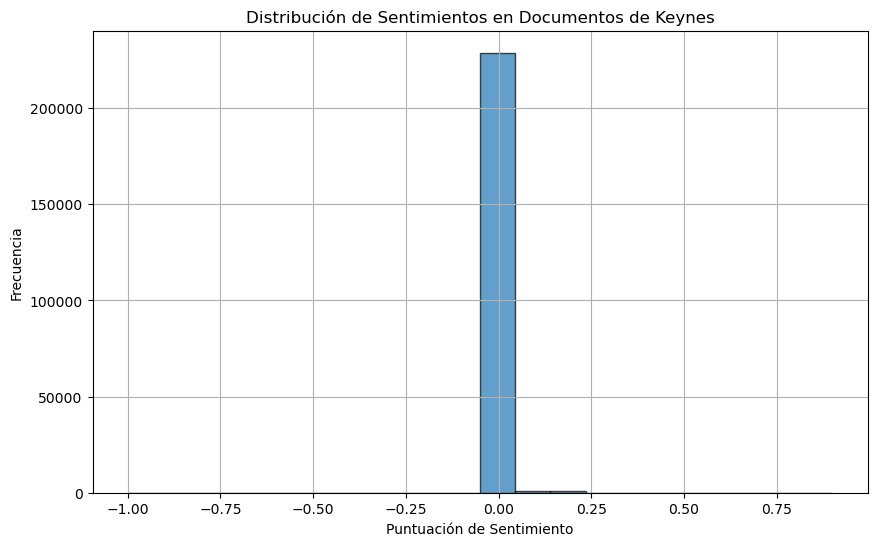

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


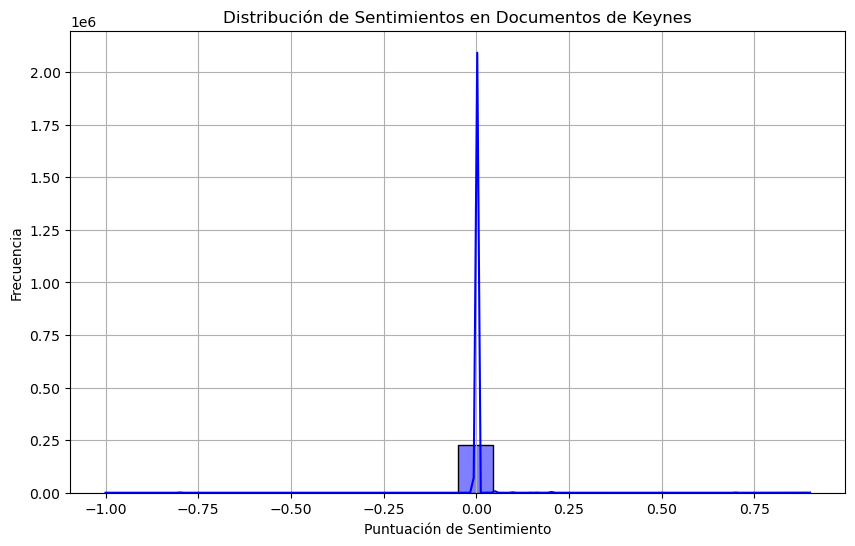

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el histograma usando matplotlib
plt.figure(figsize=(10, 6))
plt.hist(sentiments_keynes, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Sentimientos en Documentos de Keynes')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# O usando seaborn para un histograma más estilizado
plt.figure(figsize=(10, 6))
sns.histplot(sentiments_keynes, bins=20, kde=True, color='blue')
plt.title('Distribución de Sentimientos en Documentos de Keynes')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# tampoco me cierra

In [49]:
# pruebo LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

spanish_stopwords = stopwords.words('spanish')

# Crear el vectorizador de términos con las stopwords en español
vectorizer = CountVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(keynes_texts)

# Aplicar LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Mostrar los temas principales
terms = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"Tema {idx + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])


Tema 1:
['easy', 'legas', 'legendre', 'cauta', 'simpat', 'cuellos', 'derribar', 'desvaneci', 'whately', 'gobernaron']
Tema 2:
['bancos', 'banco', 'producci', 'tipo', 'oro', 'dinero', 'as', 'precios', 'si', 'vol']
Tema 3:
['easy', 'legas', 'legendre', 'cauta', 'simpat', 'cuellos', 'derribar', 'desvaneci', 'whately', 'gobernaron']
Tema 4:
['easy', 'legas', 'legendre', 'cauta', 'simpat', 'cuellos', 'derribar', 'desvaneci', 'whately', 'gobernaron']
Tema 5:
['inversión', 'alemania', 'dinero', 'capital', 'producción', 'ocupación', 'puede', 'tasa', 'interés', 'si']
